### Imports:

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Definining Score Distribution Class:

In [28]:
class IsolationForestScoreDistribution:
    """
    Analyzes and visualizes Isolation Forest anomaly score distributions. This explainability method provides
    baseline calibration, percentile thresholds, summary statistics, and histogram visualizations.
    """
    
    def __init__(self) -> None:
        """
        Initializes distribution analyzer.
        
        Args:
            None:
            
        Returns:
            None:
        """
        self.sorted_scores = None
        self.summary_stats = None
        self.percentile_thresholds = None
        
    
    def fit(self, anomaly_scores: np.ndarray) -> None:
        """
        Fits baselines score distributions.
        
        Args:
            anomaly_scores: The Isolation Forest anomaly scores
            
        Returns:
            None:
        """
        self.sorted_scores = np.sort(anomaly_scores)
        
        self.summary_stats = {
            "mean": float(np.mean(anomaly_scores)),
            "std": float(np.std(anomaly_scores)),
            "min": float(np.min(anomaly_scores)),
            "max": float(np.max(anomaly_scores))
        }
        
        self.percentile_thresholds = {
            "p90": float(np.percentile(anomaly_scores, 90)),
            "p95": float(np.percentile(anomaly_scores, 95)),
            "p99": float(np.percentile(anomaly_scores, 99)),
            "p995": float(np.percentile(anomaly_scores, 99.5))
        }
        
        
    def compute_percentile(self, anomaly_score: float) -> float:
        """
        Computes percentile rank of a single anomaly score.
        
        Args:
            anomaly_score: The Isolation Forest anomaly scores
            
        Returns:
            float: The percentile rank (0-100)               
        """
        if self.sorted_scores is None:
            raise ValueError("Distribution not fitted.")
        
        percentile = (
            np.searchsorted(self.sorted_scores, anomaly_score) / len(self.sorted_scores) * 100
        )
        
        return percentile
    
    
    def get_summary(self) -> dict:
        """
        Returns a summary of computed statistics
        
        Args:
            None:
            
        Returns:
            dict: A dicionary describing computed statistics
        """
        if self.summary_stats is None:
            raise ValueError("Distribution not fitted.")
        
        return self.summary_stats
    
    
    def get_percentile_thresholds(self) -> dict:
        """
        Returns percentile cutoff values
        
        Args:
            None:
            
        Returns:
            dict: A dictionary containing cutoff details
        """
        if self.percentile_thresholds is None:
            raise ValueError("Distribution not fitted.")
        
        return self.percentile_thresholds
    
    
    def plot_distributions(self, anomaly_scores: np.ndarray, show_thresholds: bool=True, title: str="Isolation Forest Anomaly Score Distribution") -> None:
        """
        Plots the histogram of anomaly scores.
        
        Args:
            anomaly_scores: The Isolation Forest anomaly scores
            show_thresholds: Determined whether the percentile thresholds are displayed
            title: The title of the histogram
            
        Returns:
            None:
        """
        # Creating the histogram figure
        plt.figure(figsize=(8,6))
        plt.hist(anomaly_scores, bins=50, alpha=0.7)
        
        # Shows the percentile thresholds if specified
        if show_thresholds and self.percentile_thresholds is not None:
            for label, value in self.percentile_thresholds.items():
                plt.axvline(value, linestyle="--", label=label, color=("r"))
            plt.legend()
        
        plt.xlabel("Anomaly Score")
        plt.ylabel("Frequency")
        plt.title(title)
        plt.tight_layout()
        plt.show()        

### Importing Anomaly Scores:

In [16]:
anomaly_scores = np.load(r"isolation_forests\iforest_model_1\anomaly_scores.npy")

### Visualizing Score Distributions:

In [29]:
dist_analyzer = IsolationForestScoreDistribution()
dist_analyzer.fit(anomaly_scores)

In [30]:
dist_analyzer.get_summary()

{'mean': 0.40222531626622005,
 'std': 0.07672520845885816,
 'min': 0.33313146427635193,
 'max': 0.8115599350688045}

In [31]:
dist_analyzer.get_percentile_thresholds()

{'p90': 0.5200125745146373,
 'p95': 0.5920415258442383,
 'p99': 0.6696000731830027,
 'p995': 0.6912333247864533}

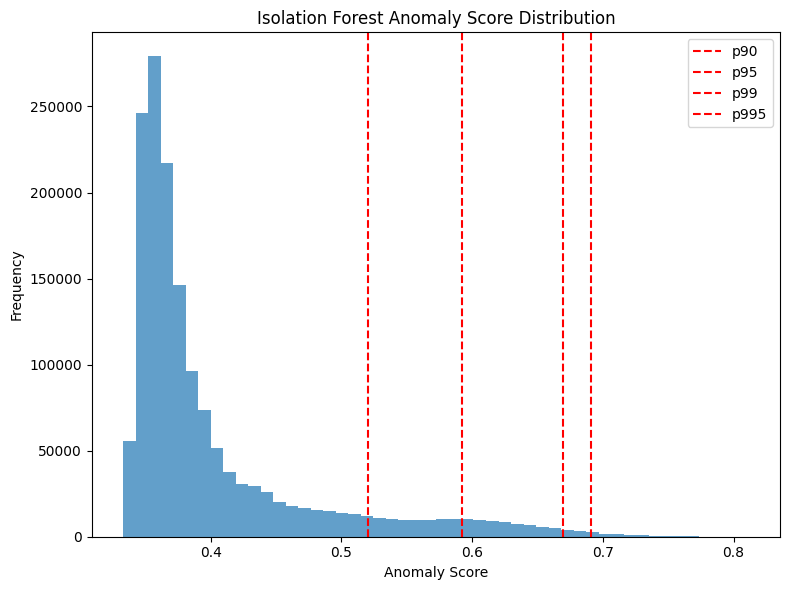

In [32]:
dist_analyzer.plot_distributions(anomaly_scores)